# Heart Attack Analysis - Confeccção do modelo de regressão logística

**Autores:**
*   Alison Rodrigues
*   Merhi Taha
*   Raelma Dionisio
*   Yan Reis
*   Ygor Oliveira

### Sobre os dados

*   **Idade (Age):** Idade do paciente

*   **Sexo (Sex):** Sexo do paciente

*   **Tipo de dor no peito (cp):** Tipo de dor no peito
    *   Valor 0: Angina típica
    *   Valor 1: Angina atípica
    *   Valor 2: Dor não anginosa
    *   Valor 3: Assintomática

*   **Pressão sanguínea em repouso (trtbps):** Pressão sanguínea em repouso (em mm Hg)

*   **Colesterol (chol):** Colesterol em mg/dl obtido através de sensor de IMC

*   **Açúcar no sangue em jejum (fbs):** (Açúcar no sangue em jejum > 120 mg/dl) (1 = verdadeiro; 0 = falso)

*   **Resultados eletrocardiográficos em repouso (rest_ecg):**
    *   Valor 0: Normal
    *   Valor 1: Apresentando anormalidade de onda ST-T (inversões de onda T e/ou elevação ou depressão de > 0.05 mV)
    *   Valor 2: Mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes

*   **Frequência cardíaca máxima atingida (thalach):** Frequência cardíaca máxima atingida

*   **Angina induzida por exercício (exang):** Angina induzida por exercício (1 = verdadeiro; 0 = falso)

*   **Pico anterior ST (oldpeak):** Depressão do segmento ST induzida pelo exercício em relação ao repouso

*   **Inclinação da frequência cardíaca (slp):** Depressão do segmento ST induzida pelo exercício em relação ao repouso

*   **Número de vasos principais (caa):** Número de vasos principais (0-3)

*   **Alvo (output):**
    *   0: Menor chance de ataque cardíaco
    *   1: Maior chance de ataque cardíaco



### Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from joblib import dump, load
import boto3

Carregando dataset (hospedei no meu github para facilitar)
*   **Origem:** https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data



### Carregando o dataset

In [ ]:
df_heart = pd.read_csv(r"https://raw.githubusercontent.com/ygor0102/DS_BD/main/heart.csv")

In [ ]:
df_heart.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df_heart.shape

(303, 14)

In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Tratando a base

Sem muita necessidade de tratativa, pois os dados já se encontram devidamente preenchidos.

In [ ]:
df_heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df_heart.duplicated().sum()

1

In [ ]:
display(df_heart.drop_duplicates(inplace=True))

None

In [ ]:
df_heart.duplicated().sum()

0

### Analisando os dados

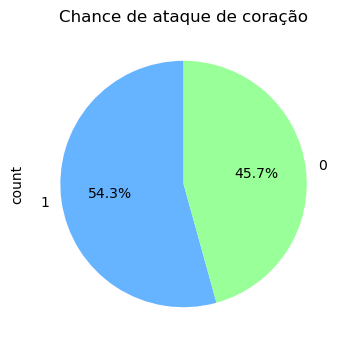

In [ ]:
# Analisando distribuição da variável alvo

contagem_classes = df_heart['output'].value_counts()

plt.figure(figsize=(4, 4))
contagem_classes.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])

plt.title('Chance de ataque de coração')
plt.show()

# 0 = Menor chance de ataque de coração
# 1 = Maior chance de ataque de coração

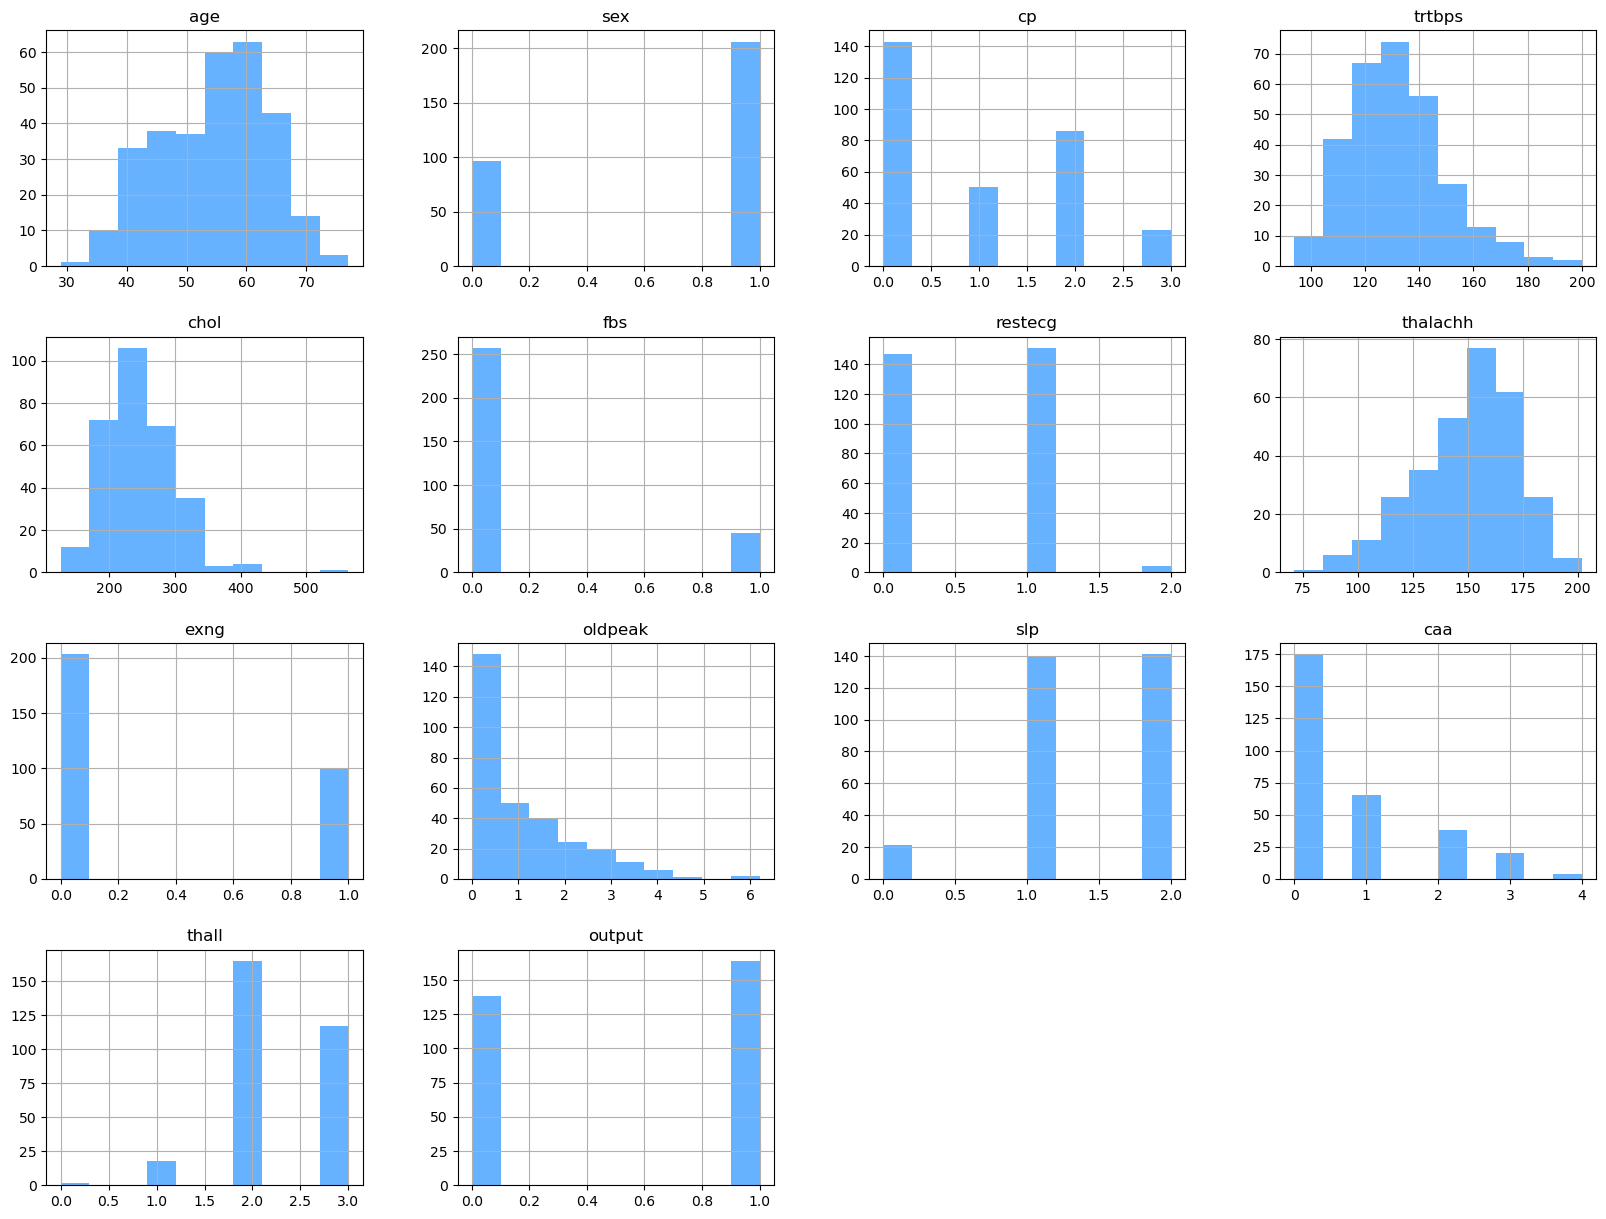

In [ ]:
df_heart.hist(figsize=(20,15), color = '#66B2FF')
plt.show()

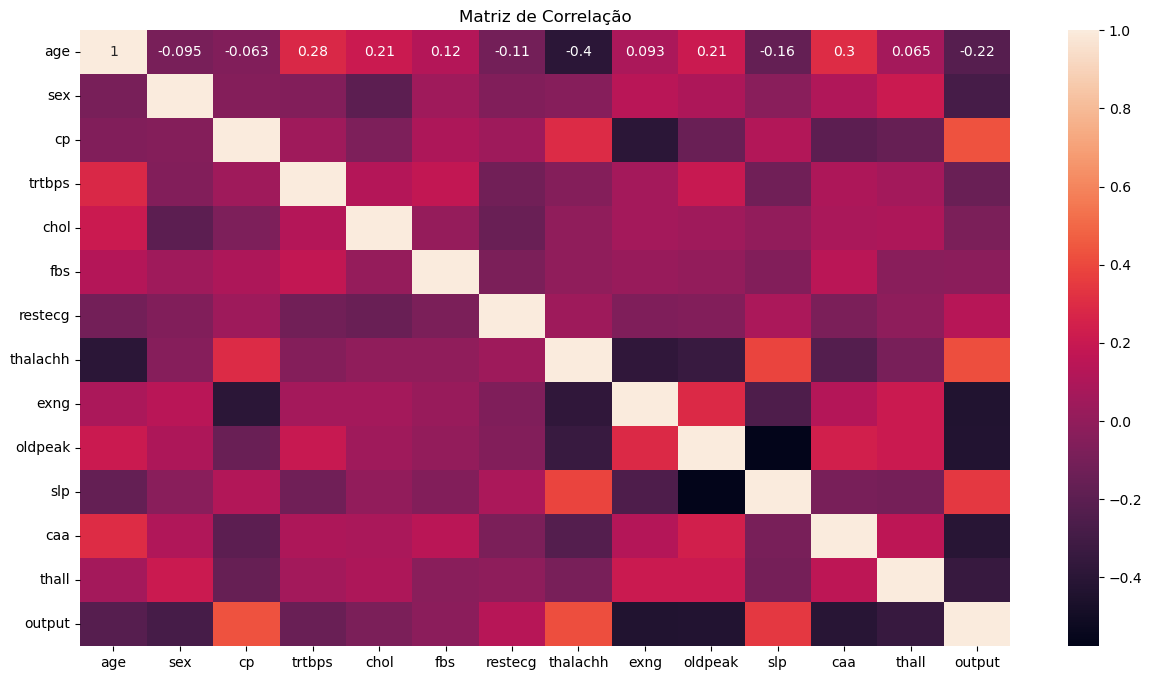

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Matriz de Correlação')

sns.heatmap(df_heart.corr(), annot=True)

plt.show()

Top correlações com variável alvo:
*   cp
*   thalachh
*   slp
*   caa
*   thall
*   exng







### Construindo o modelo de regressão logística

In [ ]:
# Definindo features e label

x= df_heart.drop('output', axis=1)
y= df_heart['output']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
# Treinando o modelo

logistic_model= LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train) # features e label

/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and

LogisticRegression(max_iter=1000)

In [ ]:
# Coeficiente

logistic_model.coef_

array([[ 1.06884168e-03, -1.22040680e+00,  8.54687604e-01,
        -1.77585000e-02, -2.56592188e-03, -4.16560658e-02,
         3.77195913e-01,  1.66397713e-02, -7.46311422e-01,
        -5.61914201e-01,  5.57608470e-01, -6.45883060e-01,
        -9.10323488e-01]])

In [ ]:
# Teste de predição

y_pred= logistic_model.predict(x_test)

/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [ ]:
# Acurácia

accuracy_score(y_test, y_pred)

/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

0.8524590163934426

/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

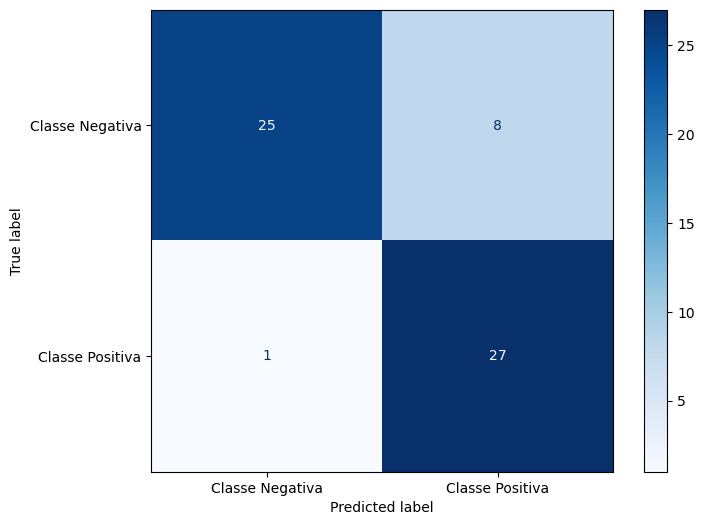

In [ ]:
# Matriz de confusão

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classe Negativa', 'Classe Positiva'])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')

plt.show()

In [ ]:
# Resultados gerais

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85        33
           1       0.77      0.96      0.86        28

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

### Salvando o modelo no Bucket S3

In [ ]:
# Exportando modelo

dump(logistic_model, 'heart_attack_model.joblib')

['heart_attack_model.joblib']

In [ ]:
s3_client = boto3.client(service_name='s3')

In [ ]:
response = s3_client.create_bucket(Bucket="ygor-bucket")

In [ ]:
response = s3_client.list_buckets()

In [ ]:
response['Buckets']

[{'Name': 'ygor-bucket',
  'CreationDate': datetime.datetime(2023, 12, 8, 2, 32, 21, tzinfo=tzlocal())},
 {'Name': 'ygor-bucket-test',
  'CreationDate': datetime.datetime(2023, 12, 4, 22, 59, 3, tzinfo=tzlocal())}]

In [ ]:
response['ResponseMetadata']['HTTPStatusCode']

200

In [ ]:
s3_client.upload_file("./heart_attack_model.joblib", "ygor-bucket", "heart_attack_model.joblib")

In [ ]:
response = s3_client.list_objects(Bucket="ygor-bucket")

In [ ]:
response['Contents']

[{'Key': 'heart_attack_model.joblib',
  'LastModified': datetime.datetime(2023, 12, 8, 2, 32, 36, tzinfo=tzlocal()),
  'ETag': '"60b2d7756780b0011e0229a17190e6d9"',
  'Size': 1423,
  'StorageClass': 'STANDARD',
  'Owner': {'DisplayName': 'ygorsouza52085',
   'ID': '8b91de5dd6ea4932b8bdd07f59bacbc717dae18dba26414f5688194e6f8c0e4a'}}]

### Testando inferência do modelo

In [ ]:
modelo = load('./heart_attack_model.joblib')

In [ ]:
dados_cliente = pd.DataFrame({
    'age': [30],
    'sex': [0],
    'cp': [4],
    'trtbps': [90],
    'chol': [210],
    'fbs': [1],
    'restecg': [0],
    'thalachh': [180],
    'exng': [0],
    'oldpeak': [2.3],
    'slp': [0],
    'caa': [1],
    'thall': [4]
})

nova_predicao = modelo.predict(dados_cliente)

probabilidades_novo_dado = modelo.predict_proba(dados_cliente) * 100

mensagem = (
    f"Predição para o novo dado: {nova_predicao}\n"
    f"Probabilidades associadas a cada classe:\n"
    f"Classe 0: {probabilidades_novo_dado[0, 0]:.2f}%\n"
    f"Classe 1: {probabilidades_novo_dado[0, 1]:.2f}%"
)

print(mensagem)

Predição para o novo dado: [1]
Probabilidades associadas a cada classe:
Classe 0: 14.62%
Classe 1: 85.38%


/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/ubuntu/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and